#### nosql database categories

1. key value stores
    - `simple and quick access`
    
    - redis
    - amazon dynamo db
    - riak
    
2. graph stores
    - `relationships between data points`
    
    - neo4js
    - amazon neptune
    - arangodb
    
3. column stores
    - `efficient for analytical queries and aggregations, more like rational but data stored in columnwise not like row in relational database`
    
    - apache cassandra
    - HBase
    - google bigtable
    
    
4. document stores
    - `stores as a document formet like JSON or BSON format`
    
    - elasticsearchdb
    - mongodb
    - couchdb

#### two types of scalling

1. web tier 
    - webservers which handles the http request


2. database tier
    - usal databases

#### load balancer

- which points pointed to the internet as a public facing IP and redirects the request to the web servers.
- internally which connects bunch of private IP web servers, and based on availability which redirects the request respecitvely each servers.
- web tier scalling done easly by adding more server to the pool of the load balancer. 

#### database replication

 - usual approach is master and slave model.
 - master handles the read operation and slave handles read operation, this choice is based on the empirical evidence most of the application read heavy applications.
 - if master dies, one of the slaves will be promoted to as the master node.
 - selection of new master node should make sure new master node has the upto data, this issue usually solved using different methods.
     - running data recovery script (most common approach).
     - multi-masters.
     - circular replication.

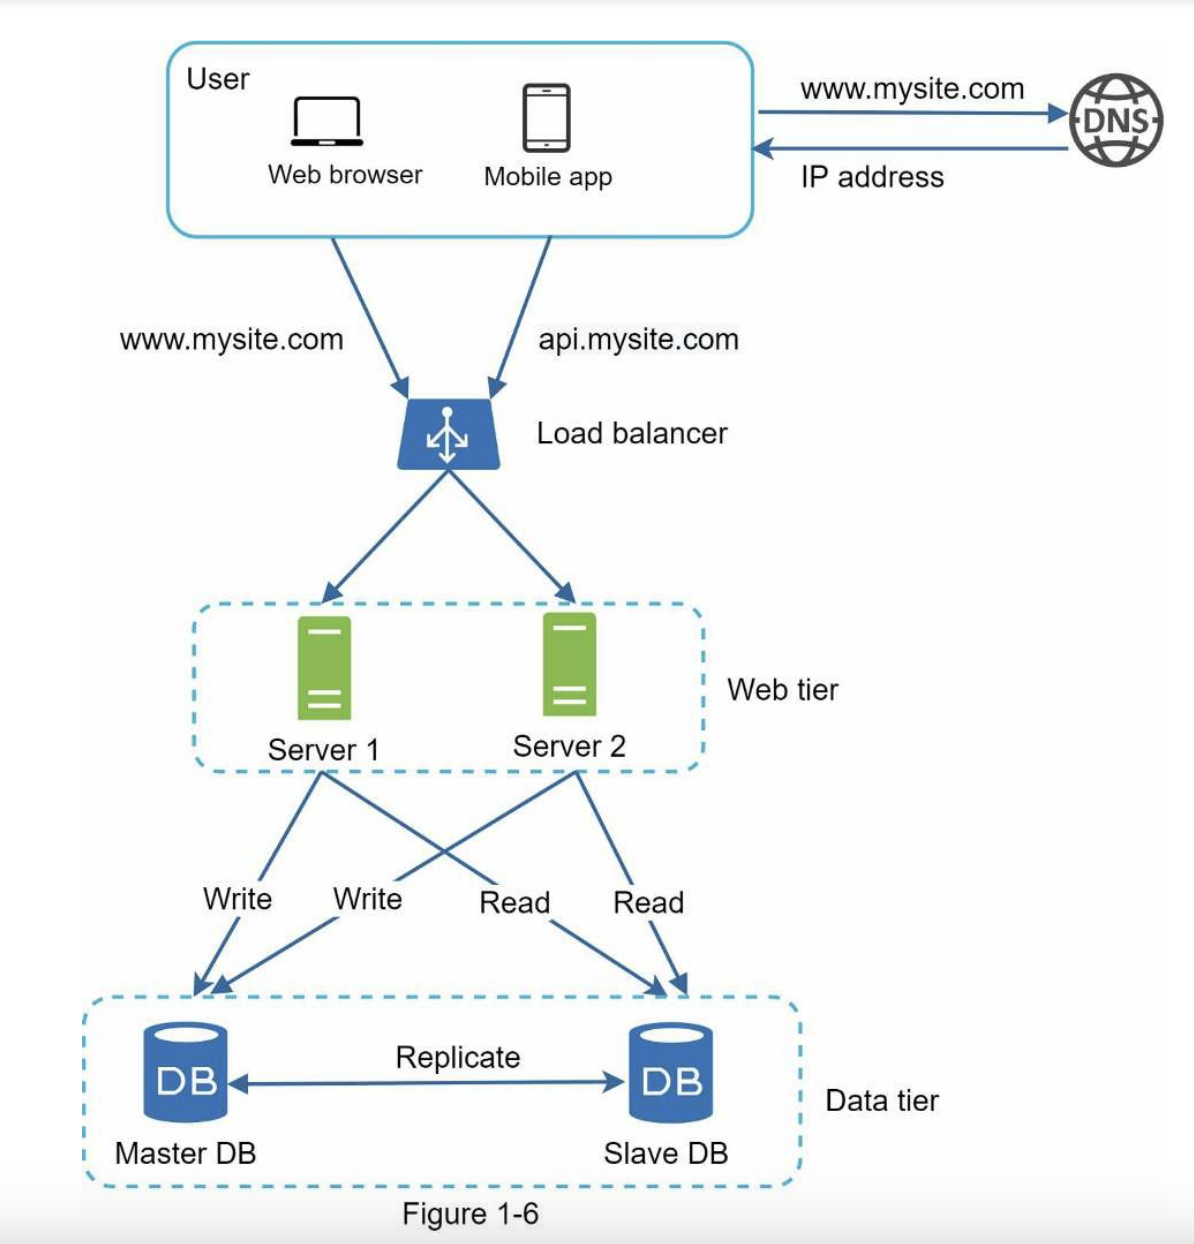

#### cache tier

`helpful to store the most frequently requested heavy requests, such that it will help to reduce load in the db tier. common approach is read-through cache.`

 - few important consideration for the cache layer
        - use it where read request is high and write request is low.
        - keep a proper expiration policy to refresh data data, shouldn't be too high and too low.
        - keeping db and cache in sync,this is challenging problem (read: scalling memcahe at facebook). 
        - evication policy, if cache is full remove some data, common eviction policy are LRU (least recently used), FIFO (first in first out), LFU (least frequently used).

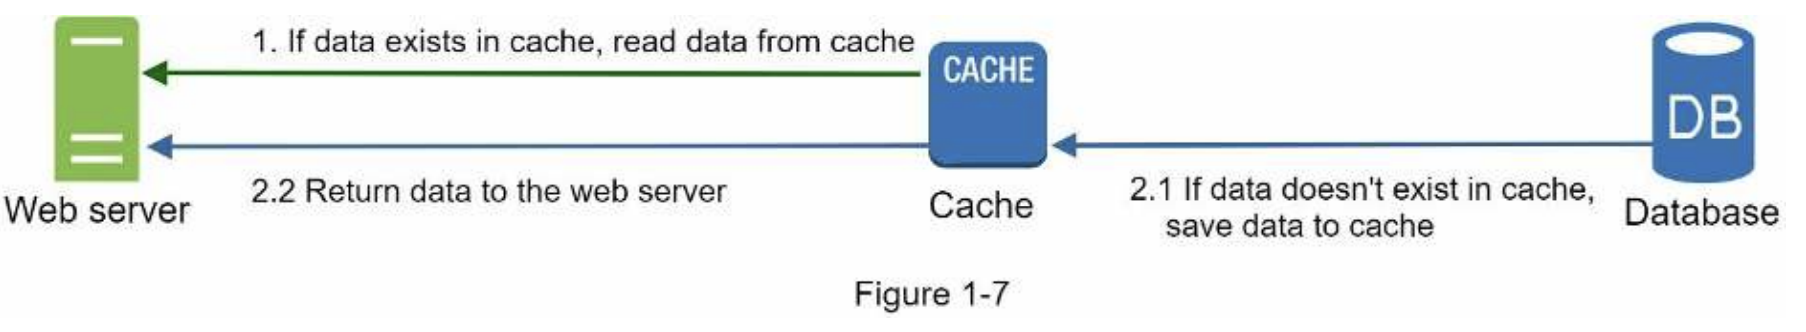

#### content delivery network (CDN)

`geographically distributed servers which stores static content like javascript,html,css etcc.. for quick access to the users instead of querying the server. (note: there is new type of CDN which stores dynamic content as well need to read about it)`

- few considerations
    - choose the cdn which are close to your target users geographically.
    - add TTL (time to live) to set expiration of the stored contents.
    - cdn hosted by thid party providers, need to be aware the cost.
    - if cdn fails we need to handle the re-routing of the client to our web servers.
    - invalidating files before expiration time.
        - this can be done by calling cdn vendors api.
        - we can use object versioning to server different version of the same object, this usually done by adding version number in url params

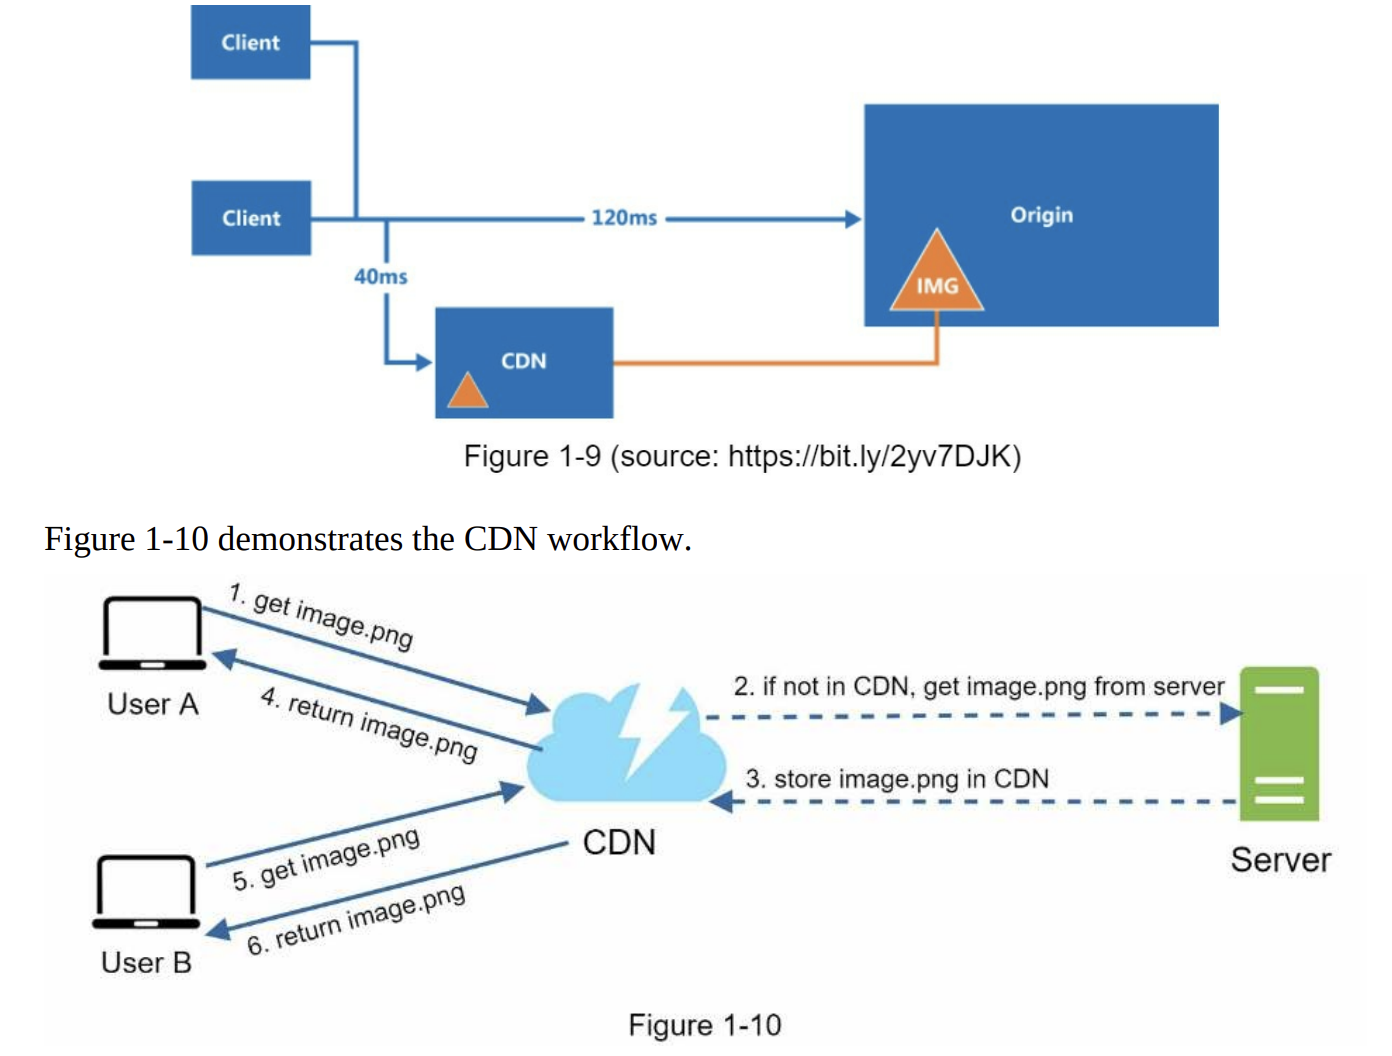

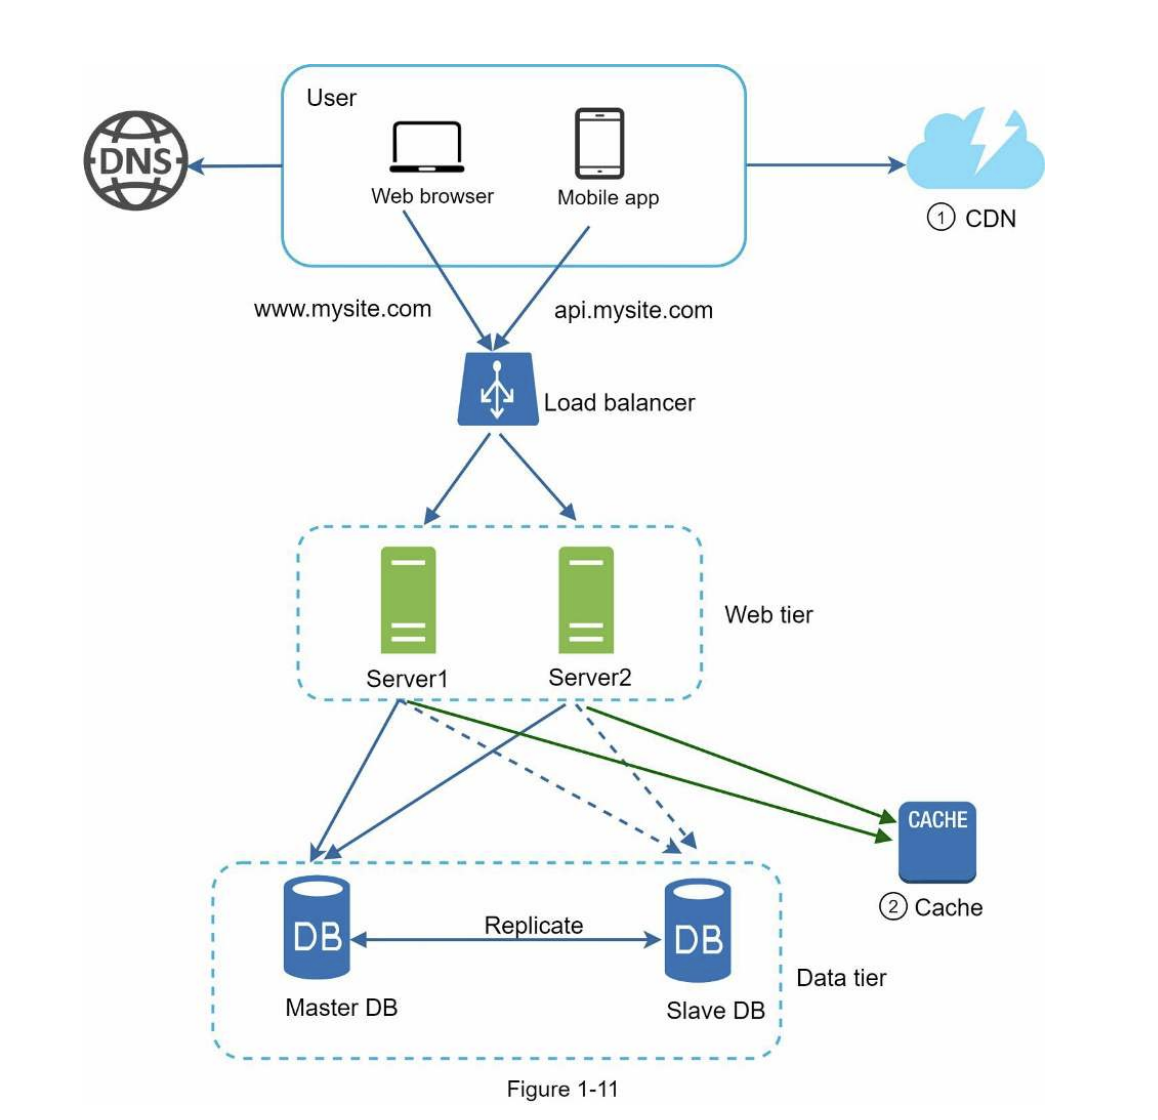

#### message queue

- system which helps to decouple communication between different services and process the requests asynchronously.
- service can publish a request to the message queue and any service which subscribed will receive that message from message queue.
- message queue act as buffere to so if any publisher and subscriber goes down, they can process the request once they back online from message queue.
- this decoupling allows to scale services independently.
- e.g. kafka,rabitmq, amazon sqs.

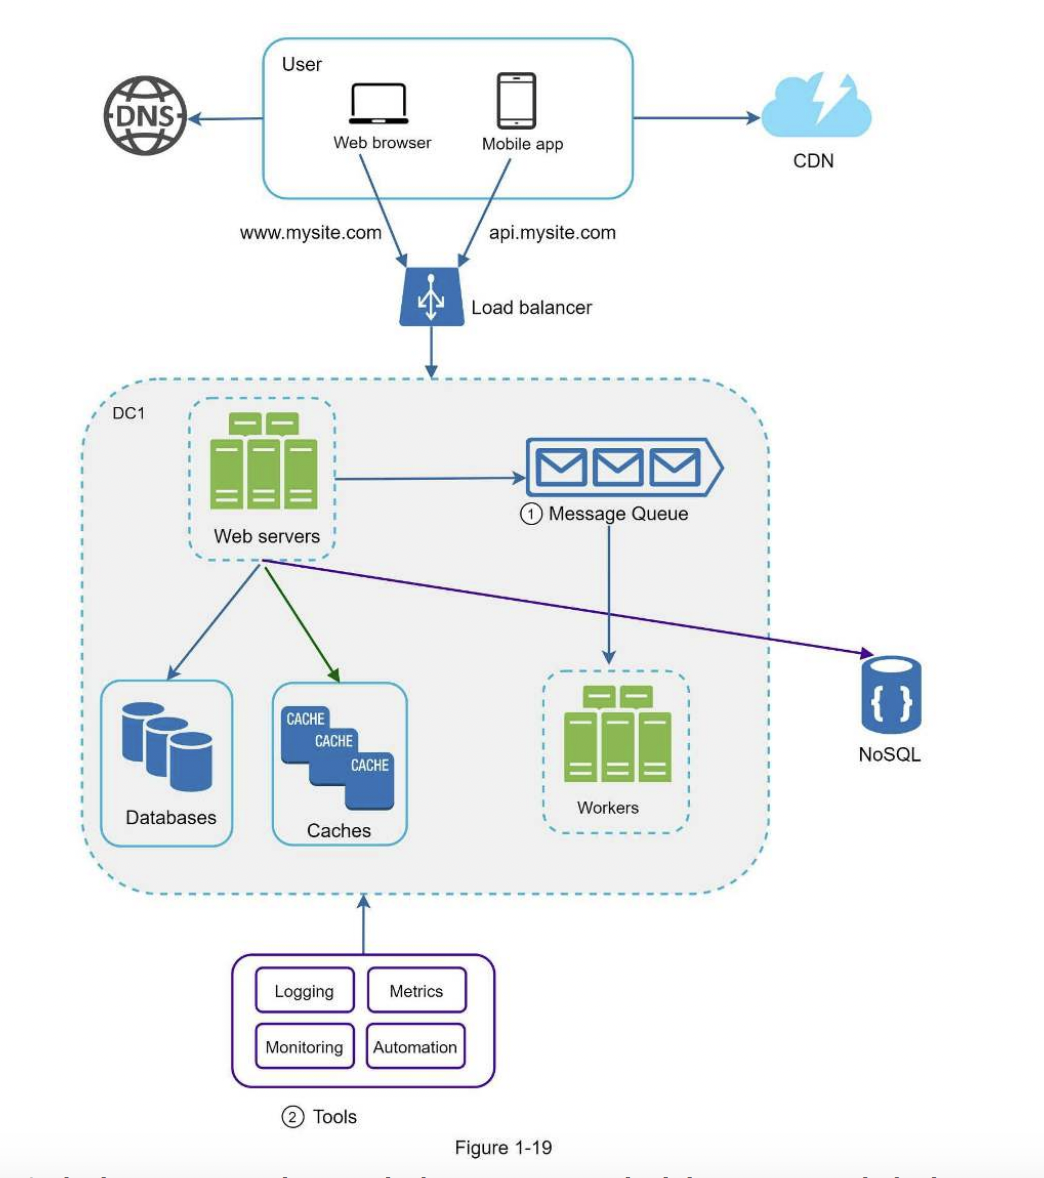

#### vertical database scaling

- this done by increasing the capacity of the same db server like adding more disk space, ram, cpu et..
- e.g amazon RDS have database server capacity of 24TB.
- case study: 2013 stackoverflow was handling monthly 10million unique user visit with single master db.
- but vertical database scaling is expensing because powerful single maching costs too high.
- single point of failure.
- other hardware limits.

#### horizontal database scaling

- this is done by spliting the data across the different databases, the technique is call sharding.
- important key factor in sharding is the sharding key which determines where to locate the queried data across the databases.
- best way to choose the sharding key is to choose a key such that data's can be evenly distributed across the machines.

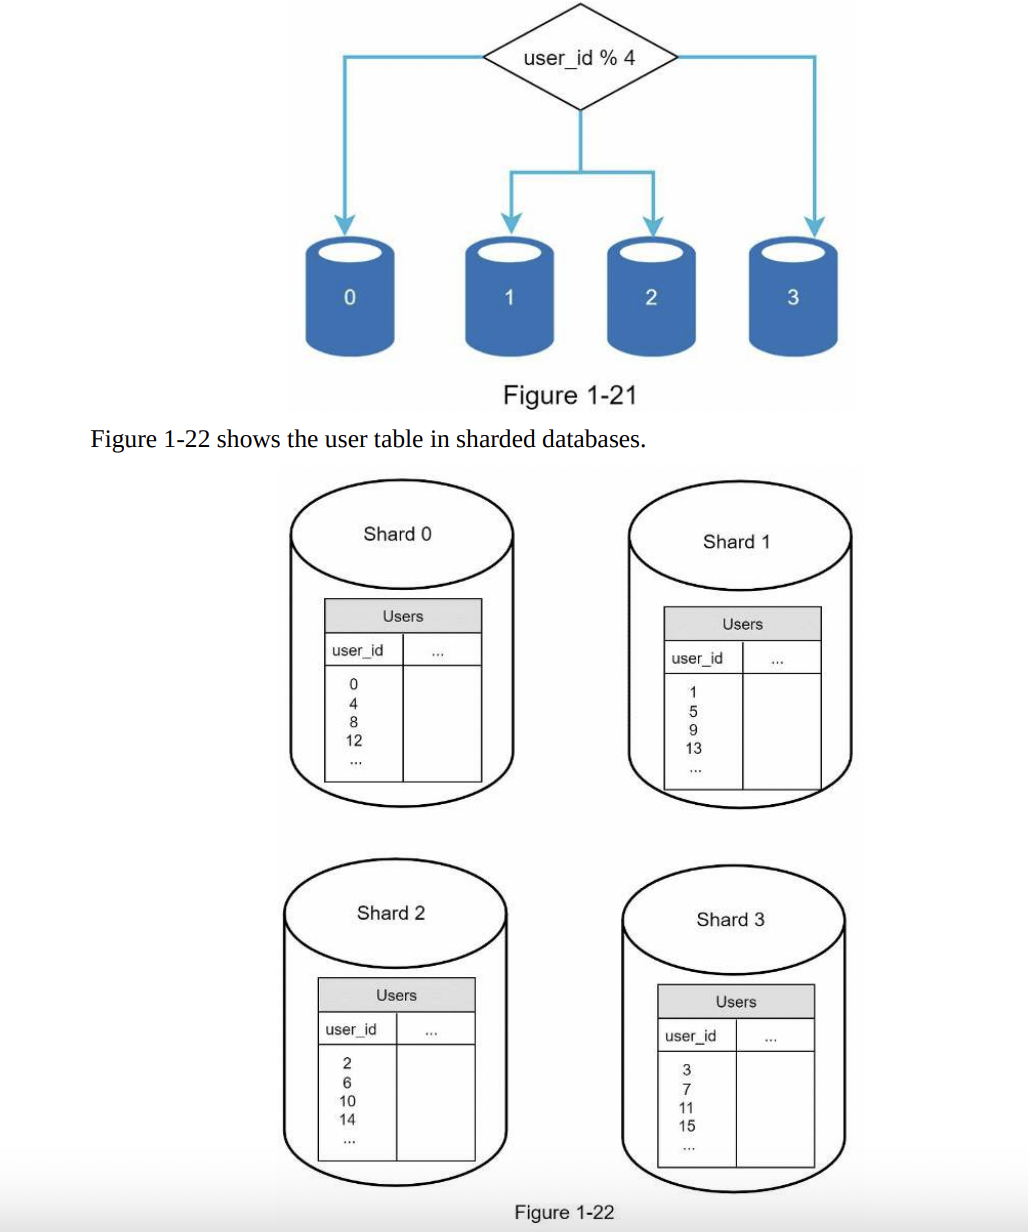

#### complexities in sharding db

- resharding
   - we need to perform resharding when single sever can't hold repid growth of data.
   - certain shard may experience too much due the uneven data distribution.

- celebrity problem
    - when cerntain shard experience too much load due the type of data interested by all the users, e.g most user may prefer to listen to ed sheeran music, so particular shard will be target by all the users.
    
- join and de-normalization
    - doing joining operation across already sharded dbs and servers are hard. to avoid that denormalize the data such it can reside in a single shard location.